In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [75]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [76]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [77]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [78]:
X_st = np.empty([X.shape[0], X.shape[1]])
X_st[0] = X[0].copy()
for i in range(1, len(X)):
    X_st[i] = calc_std_feat(X[i].astype(np.float64))

X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
# SGD

In [8]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [9]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
          print(i, W, err)
    return W

In [10]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.95625277  3.42521108  3.87283235  4.2961266 ] 98.81226581850066
200 [56.41281355  3.96885609  3.49581686  4.17842302] 41.67661786031284
300 [57.26907977  4.3891627   3.16509659  4.09250355] 40.3842299519561
400 [57.38263742  4.7240806   2.8863716   4.03935642] 40.17268139415389
500 [57.39769738  4.99168071  2.65172515  4.00902796] 40.04392869345224
600 [57.39969463  5.20604043  2.45435258  3.99429498] 39.95824552705811
700 [57.3999595   5.37818282  2.28845698  3.98997729] 39.90070956085611
800 [57.39999463  5.51676079  2.14911126  3.99239117] 39.86184318451451
900 [57.39999929  5.62858399  2.03213595  3.99894446] 39.83545331203068
1000 [57.39999991  5.71902529  1.93399184  4.00783736] 39.81745564879468


array([57.39999991,  5.71902529,  1.93399184,  4.00783736])

In [64]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            #       print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W_prev = W.copy()
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(i, W_prev, err)
    return W

In [66]:
eval_sgd_model(X_st, y, iterations=1000, qty_in_batch=5, alpha=1e-2)

100 [49.8090295   4.5552249   3.1593672   3.86040577] 75.27316476182608
200 [56.40112146  4.87078758  2.89141417  3.87432193] 39.52144851887544
300 [57.28043278  5.10660679  2.65246482  3.88120842] 40.916691931613606
400 [57.39757993  5.29636784  2.45207784  3.89451189] 40.82317596457312
500 [57.41306866  5.44979307  2.2840415   3.91134159] 40.476455020208974
600 [57.41502052  5.57415821  2.1431813   3.92970458] 40.14467613360218
700 [57.41518787  5.67518574  2.02514791  3.9482855 ] 39.85781990267791
800 [57.41513452  5.75742056  1.92627784  3.96624793] 39.6134832442199
900 [57.41506574  5.82448612  1.84348681  3.98309075] 39.40594675024659
1000 [57.41500625  5.8792792   1.77418019  3.99854415] 39.22986993219122


array([57.39809688,  5.88936698,  1.77485474,  4.0225031 ])

In [0]:
# L1 регуляризация - Lasso

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

In [0]:
# L2 регуляризация - Ridge

f(x, W) + (lambda_/2) * np.sum(W**2)

df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1

f'(x, W) + lambda_ * np.sum(W)

In [199]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_prev = W.copy()
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W_prev, err)
    return W_prev, err

In [204]:
lambda_0 = 1e-3
lambda_ = [lambda_0]
c = 200
W = np.empty([c, X_st.shape[0]])
err = np.empty([c, 1])
for i in range(c):
    W[i], err[i] = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=lambda_[i])
    if i != c-1:
        lambda_.append(lambda_[i] + lambda_0*10)

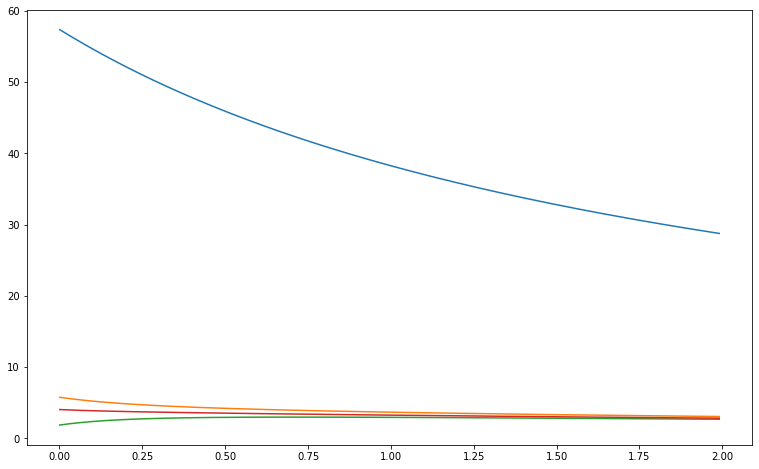

In [205]:
# Визуализируем изменение весов в зависимости от коэффициента регуляризации
plt.figure(figsize=(13, 8))
plt.plot(lambda_, W)

plt.show()

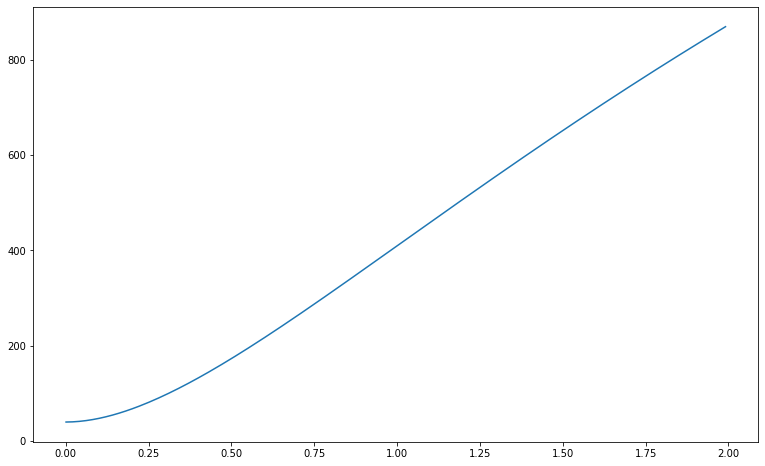

In [206]:
# Визуализируем изменение ошибки MSE в зависимости от коэффициента регуляризации
plt.figure(figsize=(13, 8))
plt.plot(lambda_, err)

plt.show()

## 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но смысла в этом нет, на мой взгляд. Я ниже сгенерировал массив с нормальным распределением, номрализировал и стандартизировал его в разных комбинациях. В итоге на графике зависимостей разных массивов видно, что значения для нормализированного распределения, и для нормализированного, а затем стандартизированного, одинаковы.

In [220]:
a = np.random.normal(10, size=1000)

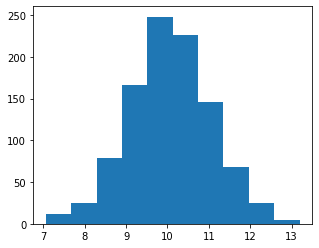

In [222]:
plt.figure(figsize=(5, 4))
plt.hist(a, bins=10)

plt.show()

In [239]:
def normalize(x):
    res = (x - x.min()) / (x.max() - x.min())
    return res

In [242]:
a_n = normalize(a.astype(np.float64))
a_st = calc_std_feat(a.astype(np.float64))
a_st_n = normalize(a_st.astype(np.float64))
a_n_st = calc_std_feat(a_n.astype(np.float64))

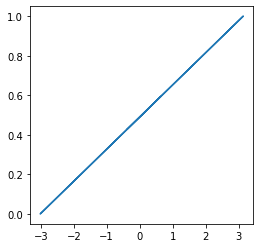

In [248]:
plt.figure(figsize=(4, 4))
plt.plot(a_st, a_st_n)

plt.show()

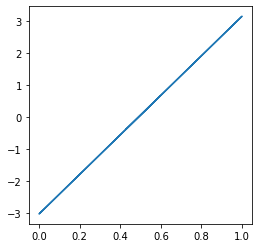

In [249]:
plt.figure(figsize=(4, 4))
plt.plot(a_n, a_n_st)

plt.show()

## 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [265]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W_prev = W.copy()
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + (lambda_/2) * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W_prev, err)
    return W_prev, err

In [266]:
eval_model_reg3(X_st, y, iterations=2500, alpha=1e-2, lambda_=lambda_0)

250 [57.0278482   4.36866989  3.02534861  4.25479973] 40.484081766915246
500 [57.39736797  5.10566585  2.46186258  4.08719627] 39.98155251698286
750 [57.39973474  5.52420407  2.09478199  4.03984589] 39.853991089941246
1000 [57.3997499   5.76570625  1.85691058  4.039004  ] 39.807124820428406
1250 [57.39975     5.90716801  1.70337627  4.0529384 ] 39.789292147523966
1500 [57.39975     5.99118091  1.6045726   4.06895742] 39.78234182897437
1750 [57.39975     6.04169298  1.54113342  4.08268785] 39.77959004100863
2000 [57.39975     6.07238986  1.50047107  4.09317544] 39.77848964666011
2250 [57.39975     6.0912157   1.47444228  4.10071612] 39.778046881618764
2500 [57.39975     6.10284968  1.4577976   4.10594453] 39.77786804107646


(array([57.39975   ,  6.10284968,  1.4577976 ,  4.10594453]),
 39.77786804107646)